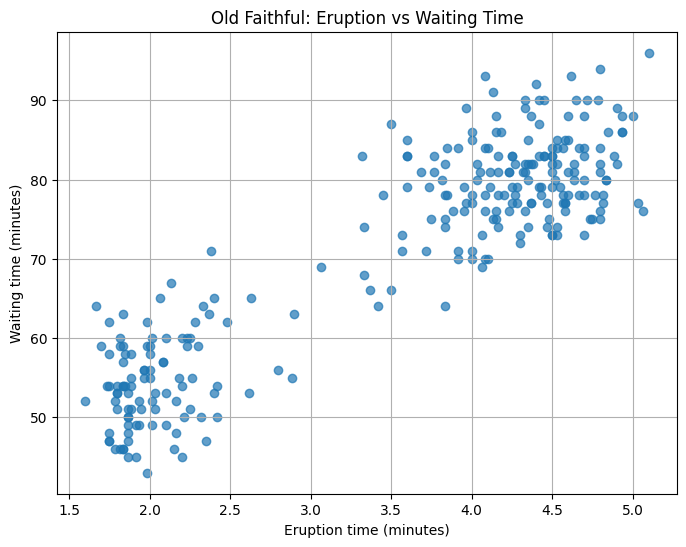

In [1]:
#Question 1 - (a) Create and print out a scatter plot of this dataset, eruption time versus waiting time.

import pandas as pd
import matplotlib.pyplot as plt

# Load the data (upload faithful.csv to your workspace)
df = pd.read_csv('/Users/yashsoni/Documents/faithful.csv')

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['eruptions'], df['waiting'], alpha=0.7)
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.title('Old Faithful: Eruption vs Waiting Time')
plt.grid(True)
plt.show()

In [2]:
# Question 1 - (b)	How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data 
# points that are close together, with regions of fewer data points between it and other “blobs”/clusters.

# Based on the scatter, there appear to be 2 clusters:
# 1. Short eruptions (~1.5–2.5 min) with waits approximate 43–65 min  
# 2. Long eruptions (~3.5–5.1 min) with waits approximate 64–96 min  

# There’s a visible gap between these two “blobs.”

In [3]:
# Question 1 - (c)	Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate 
# for this dataset? 

# Hierarchical clustering is like building a family tree for our data points. The algorithm begins by treating each eruption as its own little group. 
# Then we look at every pair of groups and find the two that are closest together—“closest” here simply means the shortest distance between them. 
# We merge those two into a single group. Next, we recalculate distances between this new group and all the others, again finding the next pair 
# that’s closest, and merge them. We keep doing this—merge one pair at a time—until everything is one big cluster or until we decide we have 
# enough groups.

# We can even draw a dendrogram (a tree diagram) to keep track of these merges, and then cut that tree at the height that gives us the number of 
# clusters we want.

# In the Old Faithful plot, the points clearly form two blobs—short eruptions with short waits, and long eruptions with long waits—separated 
# by a gap. Hierarchical clustering, especially if we use a rule that keeps clusters tight (like complete or average linkage), will naturally 
# split them into those two groups, making it a good choice for this data.

In [4]:
# Question 2 - (a)	Your source code for the k-means algorithm. You need to implement the algorithm from scratch.

import numpy as np

def k_means(X, k, max_iters=100, tol=1e-6):
    n, d = X.shape
    rng = np.random.default_rng(42)
    centers = X[rng.choice(n, size=k, replace=False)]
    obj_hist = []

    for _ in range(max_iters):
        dists = np.linalg.norm(X[:, None, :] - centers[None, :, :], axis=2)
        labels = np.argmin(dists, axis=1)

        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        

        obj = sum(((X[labels == i] - new_centers[i])**2).sum() for i in range(k))
        obj_hist.append(obj)
        

        if np.allclose(centers, new_centers, atol=tol):
            break
        centers = new_centers


    dists = np.linalg.norm(X[:, None, :] - centers[None, :, :], axis=2)
    labels = np.argmin(dists, axis=1)
    return centers, labels, obj_hist


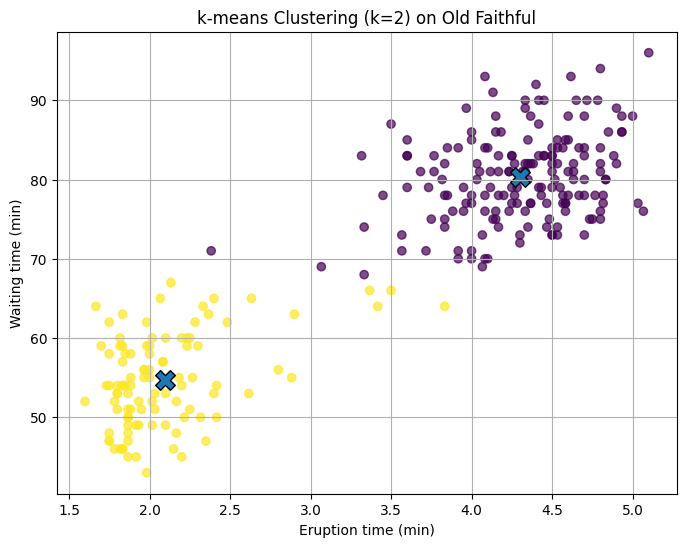

In [5]:
# Question 2 - (b) Scatter plot of the final clustering (with cluster centers)

import pandas as pd
import matplotlib.pyplot as plt

# Load data and ignore ID column if present
df = pd.read_csv('/Users/yashsoni/Documents/faithful.csv')
X = df.iloc[:, 1:].values if df.shape[1] > 2 else df.values

# Run k-means
k = 2
centers, labels, _ = k_means(X, k)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, edgecolor='k')
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time (min)')
plt.title('k-means Clustering (k=2) on Old Faithful')
plt.grid(True)
plt.show()

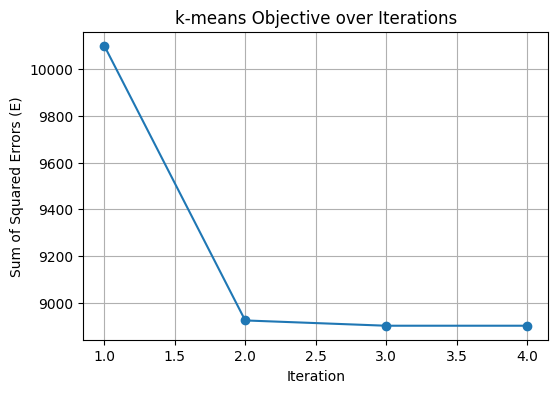

Final sum of squared errors (E): 8901.7687


In [8]:
# Question 2 (c): A plot of the k-means objective function versus iterations of the algorithm. 
# Recall that the objective function is  

# 1. Run k‐means (assuming k_means is already defined and X is your data)
k = 2
centers, labels, obj_hist = k_means(X, k)

# 2. Plot the objective over iterations
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(obj_hist) + 1), obj_hist, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Sum of Squared Errors (E)')
plt.title('k-means Objective over Iterations')
plt.grid(True)
plt.show()

# 3. Print the final sum of squared errors
final_E = obj_hist[-1]
print(f"Final sum of squared errors (E): {final_E:.4f}")

In [ ]:
# Question 2 - (d)	Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run 
# the method again with another random initialization? 

# When we run k-means with k = 2, it consistently splits the Old Faithful data into the two blobs we saw—short eruptions with 
# short waits and long eruptions with long waits. On the rare occasion that a poor random initialization misassigns a few 
# points, we can simply restart the algorithm or change the random seed. Doing so brings us right back to the clear 
# two-cluster solution from Problem 1.